In [278]:
from PolynomialRegressionModel import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from NN import NeuralNetModel
import json

In [279]:
with open("config.json", "r") as f:
    config = json.load(f)

In [280]:
model_config = config["models"]
model_config

{'enabled': True,
 'model_name': 'Cases',
 'model': {'type': 'neural_net',
  'alpha': 1e-07,
  'hidden_layer_sizes': 5000,
  'learning_rate_init': 0.01,
  'max_iter': 100000,
  'batch_size': 32,
  'tol': 1e-06,
  'n_iter_no_change': 250,
  'verbose': False},
 'datagrabber_class': 'CasesDataGrabber',
 'grab_data_from_server': True,
 'offline_dataset_date': '2020-09-26',
 'days_to_predict': 10}

In [281]:
df_vac = pd.read_csv('Confirmed_VS_Vaccinated_US.csv').drop(columns=['Unnamed: 0'])
df_vac

,ObservationDate,Confirmed,People_Fully_Vaccinated
0,2020-12-20,76818746.0,0.0
1,2020-12-21,77367360.0,0.0
2,2020-12-22,78016498.0,0.0
3,2020-12-23,78710560.0,0.0
4,2020-12-24,79377452.0,0.0
...,...,...,...
65,2021-02-23,112019890.0,41842414.0
66,2021-02-24,112464430.0,42359354.0
67,2021-02-25,112911535.0,43514673.0
68,2021-02-26,113325717.0,45521878.0


In [282]:
x = np.array(df_vac.index.values.tolist()).reshape(-1, 1)
list = []
for i in range(1,22):
    list.append(69 +i)
x_pred = np.array(list).reshape(-1, 1)
x_pred

array([[70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],
       [77],
       [78],
       [79],
       [80],
       [81],
       [82],
       [83],
       [84],
       [85],
       [86],
       [87],
       [88],
       [89],
       [90]])

In [283]:
y_c_train = df_vac.iloc[:,1]
y_v_train = df_vac.iloc[:,-1]
y_v_train

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
         ...    
65    41842414.0
66    42359354.0
67    43514673.0
68    45521878.0
69    46345540.0
Name: People_Fully_Vaccinated, Length: 70, dtype: float64

In [284]:
neural_net_model = NeuralNetModel(model_config["model_name"])
neural_net_model.train(x, y_v_train, model_config["model"])

In [285]:
beginning_day=len(x)
limit=10
next_days_x = np.array(range(beginning_day, beginning_day + limit)).reshape(-1, 1)
y_v_pred = neural_net_model.get_predictions(x_pred)

In [286]:
y_v_pred

array([47712796, 49336115, 50959434, 52582752, 54206071, 55829390,
       57452709, 59076028, 60699347, 62322666, 63945985, 65569304,
       67192623, 68815942, 70439261, 72062580, 73685898, 75309217,
       76932536, 78555855, 80179174])

In [287]:
df_y = pd.read_csv('02_28_to_03_20_vaccination.csv')
y_v_test = df_y.iloc[:,-1]
y_v_test

0     50217092.0
1     52969506.0
2     52933742.0
3     56283119.0
4     57540294.0
5     58534730.0
6     58056286.0
7     60088698.0
8     63270356.0
9     64762432.0
10    69592914.0
11    73010600.0
12    75600854.0
13    78513026.0
14    77982576.0
15    82336622.0
16    79035899.0
17    90713305.0
18    88548724.0
19    90448901.0
20    81404397.0
Name: People_Fully_Vaccinated, dtype: float64

In [288]:
import matplotlib.pyplot as plt

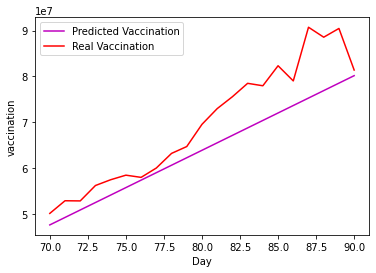

In [289]:
plt.plot(x_pred, y_v_pred, color='m', label="Predicted Vaccination")
plt.plot(x_pred,y_v_test,color='r', label="Real Vaccination")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("vaccination")
plt.show()

In [290]:
x_100 = np.array(df_vac.index.values.tolist()).reshape(-1, 1)
list = []
for i in range(1,200):
    list.append(69 +i)
x_pred_100 = np.array(list).reshape(-1, 1)

In [291]:
neural_net_model_100 = NeuralNetModel(model_config["model_name"])
neural_net_model_100.train(x, y_v_train, model_config["model"])

In [292]:
y_v_pred_vac_100 = neural_net_model_100.get_predictions(x_pred_100)
y_v_pred_vac_100

array([ 48220169,  49850944,  51481719,  53112494,  54743269,  56374044,
        58004819,  59635594,  61266369,  62897144,  64527919,  66158694,
        67789469,  69420244,  71051019,  72681794,  74312569,  75943344,
        77574119,  79204894,  80835669,  82466444,  84097219,  85727994,
        87358769,  88989544,  90620319,  92251094,  93881869,  95512644,
        97143419,  98774194, 100404969, 102035744, 103666519, 105297294,
       106928069, 108558844, 110189619, 111820394, 113451169, 115081944,
       116712719, 118343494, 119974269, 121605044, 123235819, 124866594,
       126497369, 128128144, 129758919, 131389694, 133020469, 134651244,
       136282019, 137912794, 139543569, 141174344, 142805119, 144435894,
       146066669, 147697444, 149328219, 150958994, 152589769, 154220544,
       155851319, 157482094, 159112869, 160743644, 162374419, 164005194,
       165635969, 167266744, 168897519, 170528294, 172159069, 173789844,
       175420619, 177051394, 178682169, 180312944, 

In [293]:
y_c_train_100 = df_vac.iloc[:,1]
vaccination = df_vac.iloc[:,-1]
vaccination

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
         ...    
65    41842414.0
66    42359354.0
67    43514673.0
68    45521878.0
69    46345540.0
Name: People_Fully_Vaccinated, Length: 70, dtype: float64

In [294]:
x_c_train_100 = np.vstack((np.array(df_vac.index.values.tolist()), vaccination)).T
x_c_train_100

array([[0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [2.0000000e+00, 0.0000000e+00],
       [3.0000000e+00, 0.0000000e+00],
       [4.0000000e+00, 0.0000000e+00],
       [5.0000000e+00, 0.0000000e+00],
       [6.0000000e+00, 0.0000000e+00],
       [7.0000000e+00, 0.0000000e+00],
       [8.0000000e+00, 0.0000000e+00],
       [9.0000000e+00, 0.0000000e+00],
       [1.0000000e+01, 0.0000000e+00],
       [1.1000000e+01, 0.0000000e+00],
       [1.2000000e+01, 0.0000000e+00],
       [1.3000000e+01, 0.0000000e+00],
       [1.4000000e+01, 4.4004000e+04],
       [1.5000000e+01, 2.0000000e+00],
       [1.6000000e+01, 2.0000000e+00],
       [1.7000000e+01, 2.0000000e+00],
       [1.8000000e+01, 2.1780000e+03],
       [1.9000000e+01, 4.0610000e+03],
       [2.0000000e+01, 5.9100000e+03],
       [2.1000000e+01, 1.0446960e+06],
       [2.2000000e+01, 8.5545100e+05],
       [2.3000000e+01, 9.2336300e+05],
       [2.4000000e+01, 1.0109450e+06],
       [2.5000000e+01, 2.

In [295]:
neural_net_model_100_cases = NeuralNetModel(model_config["model_name"])
neural_net_model_100_cases.train(x_c_train_100, y_c_train_100, model_config["model"])

In [296]:
x_c_test_100 = np.vstack((np.array(list), y_v_pred_vac_100)).T
x_c_test_100

array([[       70,  48220169],
       [       71,  49850944],
       [       72,  51481719],
       [       73,  53112494],
       [       74,  54743269],
       [       75,  56374044],
       [       76,  58004819],
       [       77,  59635594],
       [       78,  61266369],
       [       79,  62897144],
       [       80,  64527919],
       [       81,  66158694],
       [       82,  67789469],
       [       83,  69420244],
       [       84,  71051019],
       [       85,  72681794],
       [       86,  74312569],
       [       87,  75943344],
       [       88,  77574119],
       [       89,  79204894],
       [       90,  80835669],
       [       91,  82466444],
       [       92,  84097219],
       [       93,  85727994],
       [       94,  87358769],
       [       95,  88989544],
       [       96,  90620319],
       [       97,  92251094],
       [       98,  93881869],
       [       99,  95512644],
       [      100,  97143419],
       [      101,  98774194],
       [

In [297]:
y_c_pred_100 = neural_net_model_100_cases.get_predictions(x_c_test_100)
y_c_pred_100

array([ 175786902,  181730395,  187673888,  193617380,  199560873,
        205504366,  211447859,  217391352,  223334844,  229278337,
        235221830,  241165323,  247108816,  253052308,  258995801,
        264939294,  270882787,  276826280,  282769772,  288713265,
        294656758,  300600251,  306543744,  312487236,  318430729,
        324374222,  330317715,  336261208,  342204700,  348148193,
        354091686,  360035179,  365978672,  371922164,  377865657,
        383809150,  389752643,  395696136,  401639628,  407583121,
        413526614,  419470107,  425413600,  431357092,  437300585,
        443244078,  449187571,  455131064,  461074556,  467018049,
        472961542,  478905035,  484848528,  490792020,  496735513,
        502679006,  508622499,  514565992,  520509484,  526452977,
        532396470,  538339963,  544283456,  550226948,  556170441,
        562113934,  568057427,  574000920,  579944412,  585887905,
        591831398,  597774891,  603718384,  609661876,  615605

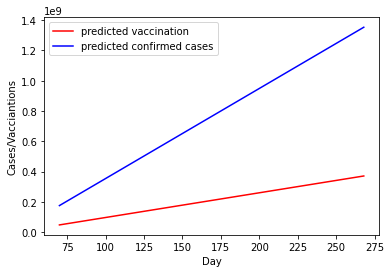

In [298]:
plt.plot(x_pred_100, y_v_pred_vac_100, color='r', label="predicted vaccination")
plt.plot(x_pred_100,y_c_pred_100,color='b', label="predicted confirmed cases")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases/Vacciantions")
plt.show()